In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analysing the data using pandas

In [2]:
df = pd.read_csv("housing.csv") # reading csv as data frame df

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Note: ocean_proximity has str values and there are some NaN values under total_bedrooms
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Returns some important descriptive statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Note there are NaN values under total_bedrooms, we need to get rid of NaN values
df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Fill NaN values by mean of non-NaN values
df = df.fillna(value=df["total_bedrooms"].mean())

In [8]:
#Note: No null values in our data
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
# Count number of distinct str values under ocean_proximity
# We need to convert str data to int
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# Note: dtype is object, we need to first convert into categorical data
df["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [11]:
# Convert dtype from object to categroical
df["ocean_proximity"] = pd.Categorical(df["ocean_proximity"])

In [12]:
# Note: dtype is now category
df["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: category
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [13]:
# Assign int8 values to unique data
df["ocean_proximity"] = df["ocean_proximity"].cat.codes

In [14]:
df["ocean_proximity"]

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int8

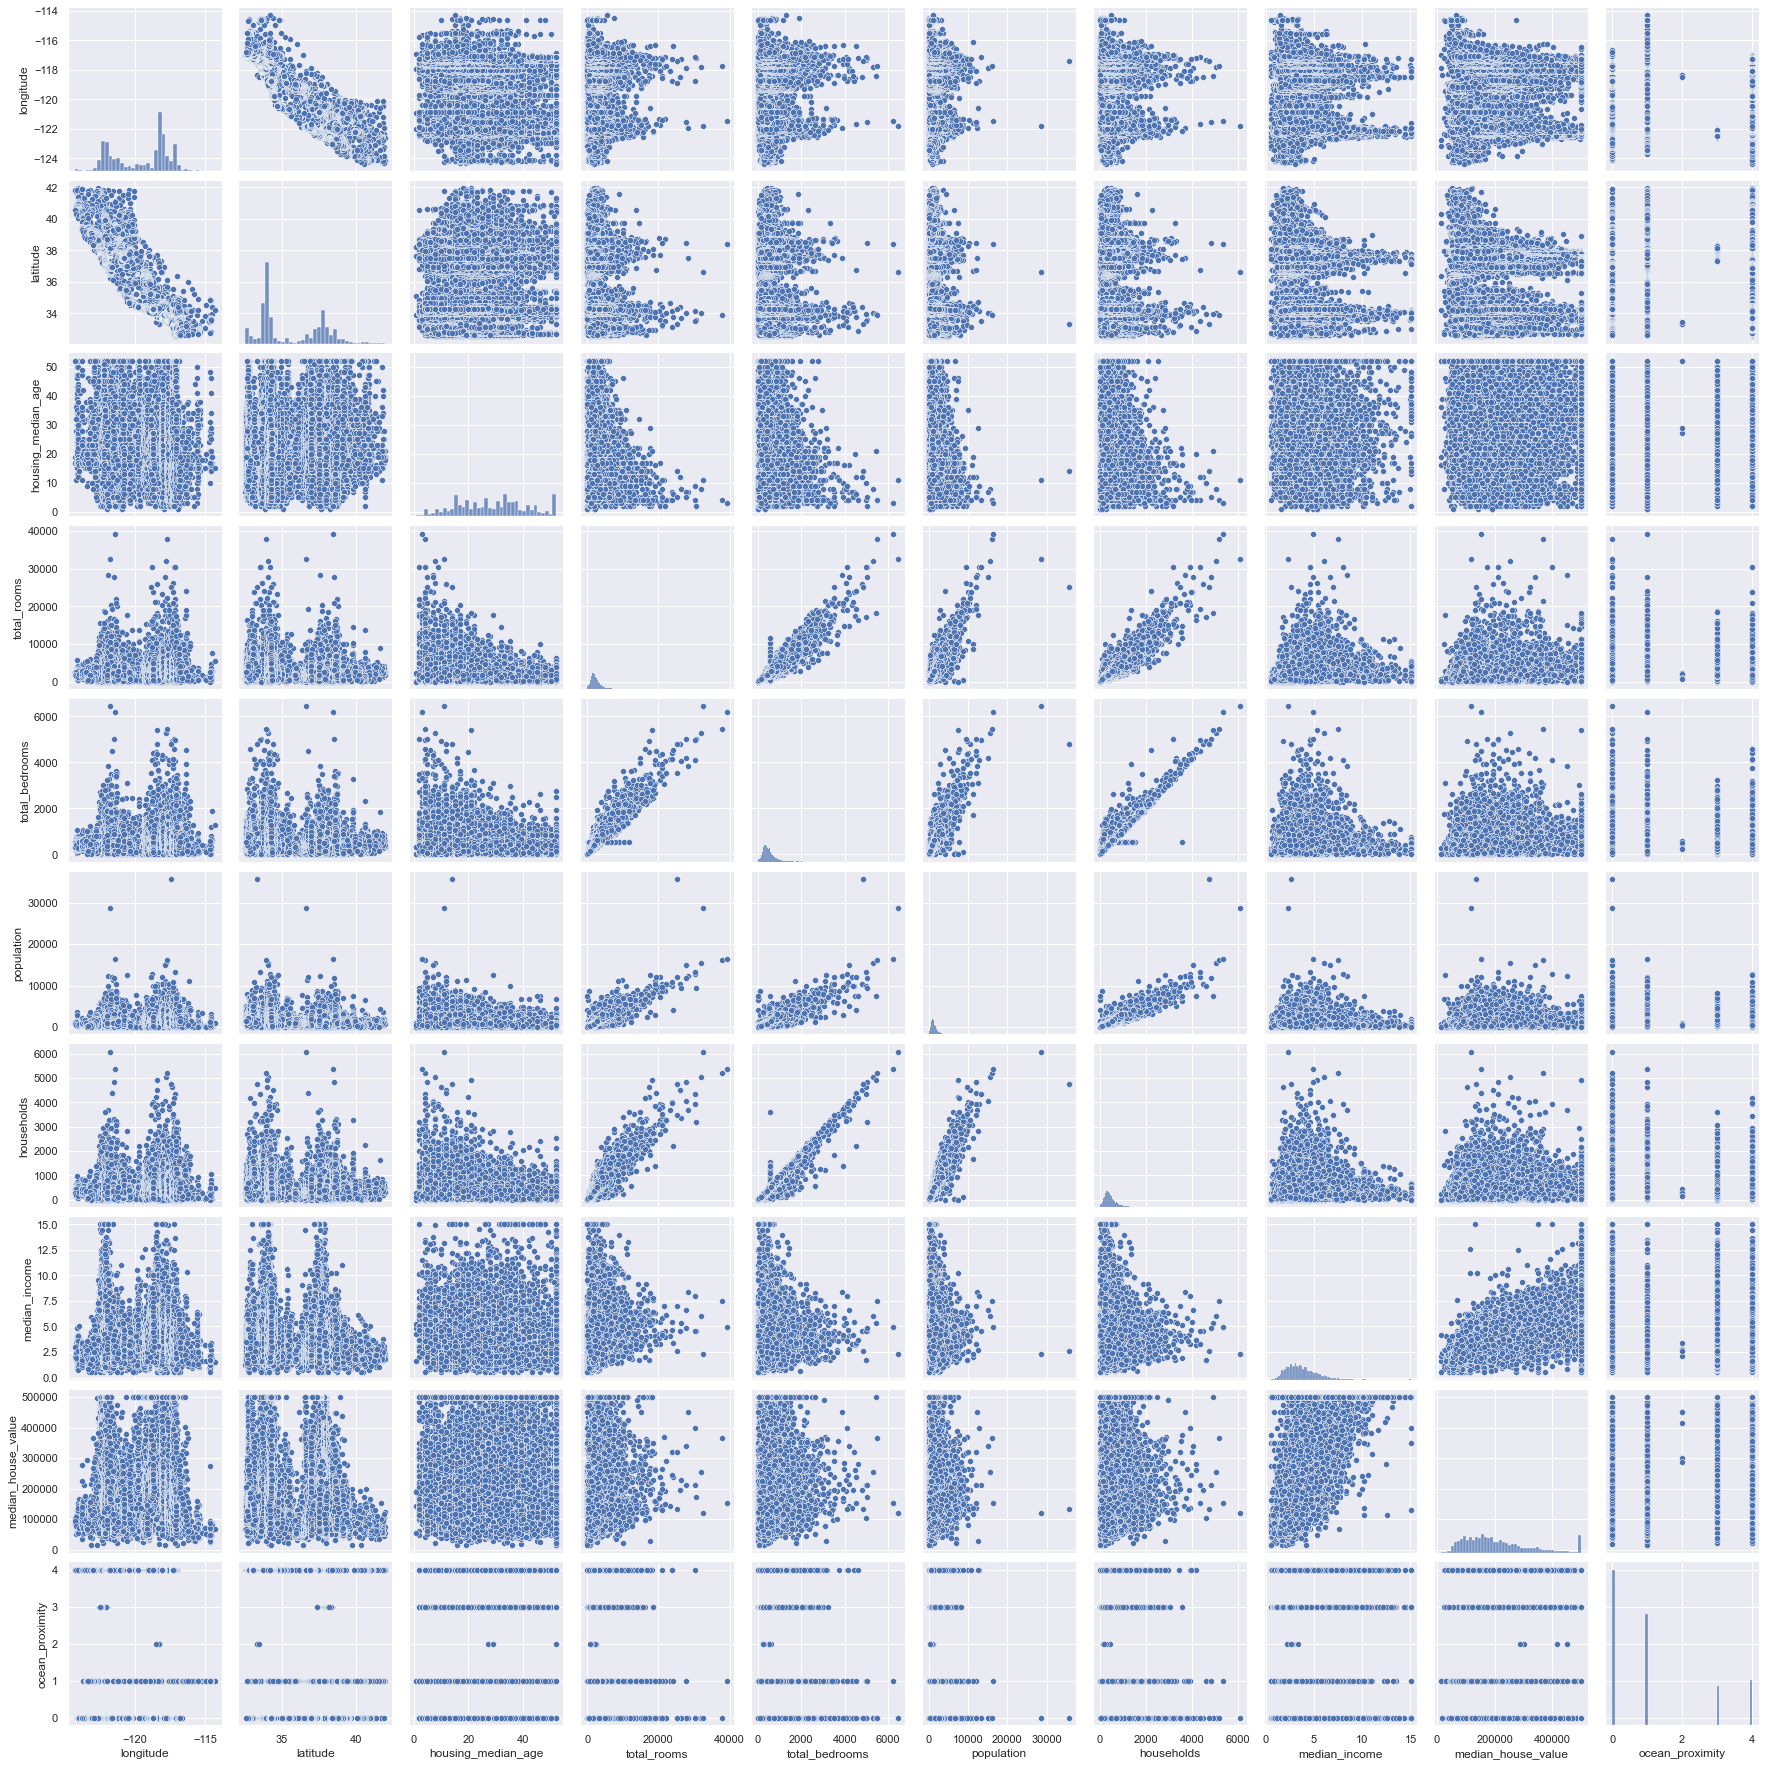

In [15]:
# A univariate distribution plot is drawn to show the marginal distribution of the data in each column.
sns.set_theme()
sns.pairplot(df)

Split data as per what we need to estimate i.e. median_house_value

In [16]:
X = df
y = df["median_house_value"]

In [17]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int8   
dtypes: float64(9), int8(1)
memory usage: 1.4 MB


In [19]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


Split the samples in train : test into 75 : 25

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.25, random_state =69)

Standardize features by removing the mean and scaling to unit variance.
   

In [22]:
# The standard score of a sample x is calculated as: z = (x - u) / s
# where u is the mean of the training samples, and s is the standard deviation of the training samples.
# Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set.
# Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)

from sklearn.preprocessing import StandardScaler
sdt = StandardScaler()

In [23]:
# Fit to data, then transform it.

X_train = sdt.fit_transform(X_train)
X_test = sdt.fit_transform(X_test)

Linear Regression

In [24]:
# Ordinary least squares Linear Regression.
# LinearRegression fits a linear model with coefficients w = (w1, ..., wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #instantiating the estimator object 
lin_reg.fit(X_train,y_train)

LinearRegression()

In [25]:
print(lin_reg.intercept_)

206665.80878552972


In [27]:
# Predict the values for testing samples
y_pred = lin_reg.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f"MAE: {round(mean_absolute_error(y_pred,y_test),6)}\n\nMSE: {round(mean_squared_error(y_pred,y_test),6)}\n\nRMSE: {round(np.sqrt(mean_squared_error(y_pred,y_test)),6)}")

MAE: 866.091901

MSE: 1444721.559748

RMSE: 1201.965707


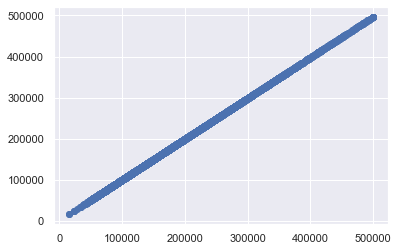

In [29]:
plt.scatter(y_test,y_pred) 

In [48]:
from sklearn.metrics import r2_score
print(f"Accuracy: {round(r2_score(y_test,y_pred)*100,3)}%")

Accuracy: 99.989%


Decision Tree Reggressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=69)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=69)

In [31]:
y_pred1 = regressor.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f"MAE: {round(mean_absolute_error(y_pred1,y_test),6)}\n\nMSE: {round(mean_squared_error(y_pred1,y_test),6)}\n\nRMSE: {round(np.sqrt(mean_squared_error(y_pred1,y_test)),6)}")

MAE: 891.384302

MSE: 1637607.760271

RMSE: 1279.690494


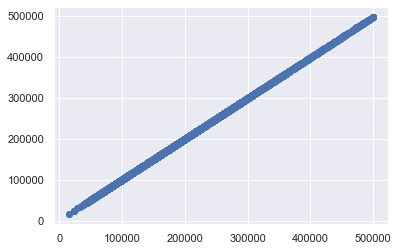

In [33]:
plt.scatter(y_test,y_pred1) 

In [49]:
from sklearn.metrics import r2_score
print(f"Accuracy: {round(r2_score(y_test,y_pred1)*100,3)}%")

Accuracy: 99.988%


Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=69)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=69)

In [35]:
y_pred2 = regr.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f"MAE: {round(mean_absolute_error(y_pred2,y_test),6)}\n\nMSE: {round(mean_squared_error(y_pred2,y_test),6)}\n\nRMSE: {round(np.sqrt(mean_squared_error(y_pred2,y_test)),6)}")

MAE: 27258.096074

MSE: 997588404.918709

RMSE: 31584.622919


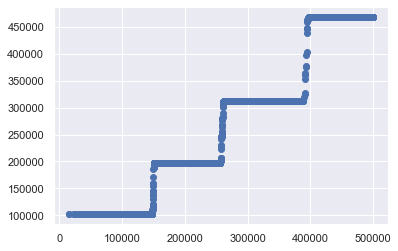

In [37]:
plt.scatter(y_test,y_pred2) 

In [50]:
from sklearn.metrics import r2_score
print(f"Accuracy: {round(r2_score(y_test,y_pred2)*100,3)}%")

Accuracy: 92.598%


In [38]:
data0 = {'Predicted': y_pred,'Actual': y_test, "RMSE" : np.sqrt(mean_squared_error(y_pred,y_test)), "MSE" : mean_squared_error(y_pred,y_test), "MAE": mean_absolute_error(y_pred,y_test)}
df0 = pd.DataFrame(data0)
df0.head()

,Predicted,Actual,RMSE,MSE,MAE
9995,164084.279020,164500.0,1201.965707,1.444722e+06,866.091901
5120,117362.071785,117400.0,1201.965707,1.444722e+06,866.091901
11002,285204.905418,286600.0,1201.965707,1.444722e+06,866.091901
19854,68953.500383,68600.0,1201.965707,1.444722e+06,866.091901
5427,447294.261303,450000.0,1201.965707,1.444722e+06,866.091901


In [57]:
data1 = {'Predicted': y_pred1,'Actual': y_test, "RMSE" : np.sqrt(mean_squared_error(y_pred1,y_test)), "MSE" : mean_squared_error(y_pred1,y_test), "MAE": mean_absolute_error(y_pred1,y_test)}
df1 = pd.DataFrame(data1)
df1.head()

,Predicted,Actual,RMSE,MSE,MAE
9995,164100.0,164500.0,1279.690494,1.637608e+06,891.384302
5120,117400.0,117400.0,1279.690494,1.637608e+06,891.384302
11002,285300.0,286600.0,1279.690494,1.637608e+06,891.384302
19854,69000.0,68600.0,1279.690494,1.637608e+06,891.384302
5427,447400.0,450000.0,1279.690494,1.637608e+06,891.384302


In [40]:
data2 = {'Predicted': y_pred2,'Actual': y_test, "RMSE" : np.sqrt(mean_squared_error(y_pred2,y_test)), "MSE" : mean_squared_error(y_pred2,y_test), "MAE": mean_absolute_error(y_pred2,y_test)}
df2 = pd.DataFrame(data2)
df2.head()

,Predicted,Actual,RMSE,MSE,MAE
9995,196268.935974,164500.0,31584.622919,9.975884e+08,27258.096074
5120,101459.668768,117400.0,31584.622919,9.975884e+08,27258.096074
11002,312460.847515,286600.0,31584.622919,9.975884e+08,27258.096074
19854,101459.668768,68600.0,31584.622919,9.975884e+08,27258.096074
5427,469038.150171,450000.0,31584.622919,9.975884e+08,27258.096074
